# Tarea 1

### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como: 
**apellido_nombre_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de la tarea es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

**1)** Utilize el código que damos a continuación para resolver las siguientes ecuaciones: 


***a***
$$
\frac{dy}{dt} = \lambda y
$$
con $\lambda = 1$ y $\lambda = i$ con conditiones iniciales $y_0=2$ y en el intervalo $t=[0,5]$.

***b***

$$
\frac{dy}{dt} = y - y^2
$$

con $y_0 = 0:01:2$ en el intervalo $t=[0,10]$.

***c***
$$
\frac{d}{dt}\left(
    \begin{array}{c}
    y_1 \\
    y_2
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{c}
    -sin(y_2) \\
    y_1
    \end{array}
    \right)
$$

con con $y_0 = (0.1,0)$ en el intervalo $t=[0,10]$. 

Grafique las soluciones obtenidas.

Estos sistemas tienen cantidades conservadas, verifique que tan bien se satisface dicha conservación. 

In [7]:
"""
    Euler(f,y0,t0,h)

Hace un paso del método de Euler explícito: 
    f = función que nos da la tangente como en (y,t,p)
    y0 = y inicial
    t0 = t inicial
    h = dt

# Examples
```julia-repl
julia> 
function f(y,t)
    return -y + sin(2π*t)
end
h= 0.1
Euler(f,1,0,h)
0.9
```
"""
function Euler(f,y0,t0,h)
    return y0 + h*f(y0,t0)
end

"""
    Euler(f,y0,t0,h,p)

Hace un paso del método de Euler explícito: 
    f = función que nos da la tangente como en (y,t,p)
    y0 = y inicial
    t0 = t inicial
    h = dt
    p = parametros opcionales.

# Examples
```julia-repl
julia> 
function f(y,t,p)
    return -p[1]*y + sin(2π*t) + p[2]
end
h= 0.1
Euler(f,1,0,h,[1,2])
1.1
```
"""
function Euler(f,y0,t0,h,p)
    return y0 + h*f(y0,t0,p)
end

Euler

In [8]:
"""
    ODEproblem(Method, f, y0, intervalo, N) 

Hace una evolución de una ecuación ordindaria dada por f(y,t) usando Method.
    Method: algún método de integración, por ejemplo Euler(f,y0,t0,h)
    f = función que nos da la tangente como en (y,t)
    y0 = y inicial
    intervalo = (t_inicial, t_final)
    N = número de pasos

# Examples
```julia-repl
julia> 
function f(y,t)
    return -y + sin(2π*t)
end

y0 = 0.0
intervalo = (0,1)
t, y = ODEproblem(Euler, f, y0, intervalo, 101)
```
"""
function ODEproblem(Method, f, y0, intervalo, N)
    a,b = intervalo
    h = (b-a)/(N-1)
    y = zeros(N)
    t = zeros(N)
    y[1] = y0
    t[1] = a
    for i in 2:N
        t[i] = t[i-1] + h
        y[i] = Method(f,y[i-1],t[i-1],h)
    end
    return (t[:] ,y[:])
end

function ODEproblem(Method, f, y0, intervalo, N,p)
    a,b = intervalo
    h = (b-a)/(N-1)
    y = zeros(N)
    t = zeros(N)
    y[1] = y0
    t[1] = a
    for i in 2:N
        t[i] = t[i-1] + h
        y[i] = Method(f,y[i-1],t[i-1],h,p)
    end
    return (t[:] ,y[:])
end

ODEproblem (generic function with 2 methods)

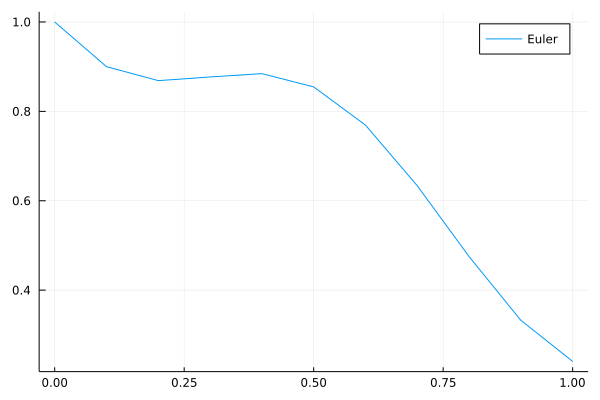

In [9]:
using Plots
gr()
function f(y,t,p=1)
    return -y + sin(2π*t)
end

N=11
y0 = 1.0
intervalo = (0,1)
t_e, y_e = ODEproblem(Euler, f, y0, intervalo, N)

plot(t_e,y_e, label="Euler")

In [10]:
"""
    ODEmultidim(Method,f,y0,intervalo,N) 

Hace una evolución de una ecuación ordindaria dada por f(y,t) usando Method.
    Method: algún método de integración, por ejemplo Euler(f,y0,t0,h)
    f = función que nos da la tangente como en (y,t)
    y0 = y inicial
    intervalo = (t_inicial, t_final)
    N = número de pasos

# Examples
```julia-repl
julia> 
f(t,y)=[y[2],g/l*y[1]]
y0=[0.0,0.5]
intervalo=(0,1)
N=101
t,y=ODEmultidim(RK4,f,y0,intervalo,N)
```
"""
function ODEmultidim(Method,f,y0,intervalo,N)
    (a,b) = intervalo
    h = (b-a)/(N-1)
    t = zeros(N)
    y = zeros((length(y0),N))
    t[1] = a
    y[:,1] = y0
    for i in 2:N
        t[i] = t[i-1] + h
        y[:,i] = Method(f,y[:,i-1],t[i-1],h)         
    end
    return (t[:],y[:,:])
end

ODEmultidim

**2)** Construya métodos de Runge-Kutta de 2do (He y 4to orden utilizando como base el código anterior. Resuelva los problemas anteriores y compare.

**3)** Grafique soluciones, distintas componentes, diferencias de soluciones con distinta resolución o tolerancia y/o con distintos datos iniciales (por ejemplo muy próximos entre sí).

**4)** Para todos los métodos anteriores estudie convergencia y calcule los factores Q.

**5)** En el directorio Dipolo_mag_3d un notebook en Julia que realiza una integración de una partícula cargada en presencia de un dipolo magnético. Este notebook utiliza una librería para resolver dicho problema. Juegue con las soluciones y la librería, entienda cada paso, ejecute distintas condiciones initiales, cambie las tolerancias, cambie los métodos, etc. 

**6)** Use el notebook *stability_region* para investigar la región de convergencia de varios métodos de las librerías. Entienda que se está haciendo.


**7)** Construya su propio código para su ecuación favorita (alguna que no sea muy complicada, en la página del paquete DifferentialEquations de Julia hay varios ejemplos, o puede usar el dipolo 2D (orbitas coplanares)). Evolucione con distintas tolerancias, con paso fijo (vea como se hace esto en cada caso, use métodos fijos o adaptativos). Grafique diferencias de soluciones con distinta resolución o tolerancia y/o con distintos datos iniciales muy próximos.
Estudie convergencia, encuentre soluciones con distintos pasos (fijos), haga los cocientes y grafique el factor $Q$.

**8)** **Para los ambiciosos** Busque una ecuación que sea stiff y evolucione con un método apropiado. Un caso simple es la ecuación: 

\begin{eqnarray}
u_t &=& v \\
v_t &=& \frac{1}{\epsilon}(u - v)
\end{eqnarray}
with $\epsilon > 0$ muy pequeño. Este permite usar métodos IMEX.